# Project: Wrangling and Analyze Data

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import json
import requests

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
r = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(r.content)
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

3. Add additional data obtained via the Twitter API (tweet_json.txt)

In [4]:
my_list = []
with open('tweet-json.txt') as file:
    for line in file:
        js = json.loads(line)
        val = {'tweet_id': js['id'], 'retweets': js['retweet_count'], 'likes': js['favorite_count']}
        my_list.append(val)
        
tweet_info = pd.DataFrame(my_list)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issues**.


In [5]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [6]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tweet_id  2354 non-null   int64
 1   retweets  2354 non-null   int64
 2   likes     2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [7]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [9]:
tweet_info.head(2)

,tweet_id,retweets,likes
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


In [10]:
image_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### Quality issues

Programmatic Assessment
1. timestamp column should be datetime data type, not string

2. tweets that are retweets should be removed from the dataframe

3. some entries are not original tweets but replies to other tweets or comments

4. columns such as retweeted_status_id, in_reply_to_status_id should be removed since they will only contain null values

5. Incomplete data in image_predictions dataset (2075 entries instead of 2356)

6. dog types should be category data type, tweet_id should be string not int

Visual Assessment

7. Null values in expanded_url column.

8. image_predictions should be summarized into more useful columns for proper analysis

9. rating_denominator and rating_numerator was extracted improperly for some columns.

### Tidiness issues

Visual Assessment

1. tweet_info dataframe should be merged to twitter_archive dataframe as they are the same observational unit.

2. image_predictions dataframe should be merged to twitter_archive dataframe.

Programmatic Assessment

3. columns 'pupper', 'doggo', 'floofer' and 'puppo' should be merged as one variable should be a column (not 4 as it is in this case).

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [11]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_info_clean = tweet_info.copy()

### Issue 1:

#### Define: columns 'pupper', 'doggo', 'floofer' and 'puppo' should be merged as one variable should be a column

#### Code

In [12]:
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=twitter_archive.columns[:-4],
       var_name='types', value_vars=['doggo', 'floofer', 'pupper', 'puppo'], value_name= 'dog_type')
twitter_archive_clean.drop('types', axis =1, inplace=True)
twitter_archive_clean.drop_duplicates(inplace=True)
ind = twitter_archive_clean[twitter_archive_clean.tweet_id.duplicated()].tweet_id.values
for index in ind:
    mask = twitter_archive_clean.tweet_id == index
    for k, val in enumerate(twitter_archive_clean[mask].dog_type.values):
        if val == 'None':
            i = twitter_archive_clean[mask].dog_type.index
            twitter_archive_clean.drop(i[k], inplace=True)
twitter_archive_clean.dog_type = twitter_archive_clean['dog_type'].replace('None', np.nan, regex=False)

#### Test

In [13]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 0 to 8151
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2370 non-null   int64  
 1   in_reply_to_status_id       79 non-null     float64
 2   in_reply_to_user_id         79 non-null     float64
 3   timestamp                   2370 non-null   object 
 4   source                      2370 non-null   object 
 5   text                        2370 non-null   object 
 6   retweeted_status_id         183 non-null    float64
 7   retweeted_status_user_id    183 non-null    float64
 8   retweeted_status_timestamp  183 non-null    object 
 9   expanded_urls               2311 non-null   object 
 10  rating_numerator            2370 non-null   int64  
 11  rating_denominator          2370 non-null   int64  
 12  name                        2370 non-null   object 
 13  dog_type                    394 n

### Issue 2:

#### Define
tweet_info dataframe should be merged to twitter_archive dataframe

#### Code

In [14]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_info_clean, how='left', on='tweet_id')

#### Test

In [15]:
twitter_archive_clean.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweets,likes
984,735274964362878976,NaN,NaN,2016-05-25 01:03:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in your...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/735274964...,11,10,None,NaN,4707.0,9629.0
2193,712309440758808576,NaN,NaN,2016-03-22 16:06:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Reminder that we made our first set of sticker...,NaN,NaN,NaN,https://twitter.com/stickergrub/status/7099191...,12,10,None,pupper,26.0,269.0


### Issue 3:


#### Define
tweets that are retweets should be removed from the dataframe
some entries are not original tweets but replies to other tweets or comments

#### Code

In [16]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isna()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isna()]

#### Test

In [17]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 0 to 2369
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2108 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2108 non-null   object 
 4   source                      2108 non-null   object 
 5   text                        2108 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2105 non-null   object 
 10  rating_numerator            2108 non-null   int64  
 11  rating_denominator          2108 non-null   int64  
 12  name                        2108 non-null   object 
 13  dog_type                    347 n

### Issue 4:


#### Define
columns such as retweeted_status_id, in_reply_to_status_id should be removed since they will only contain null values

#### Code

In [18]:
twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

#### Test

In [19]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 0 to 2369
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2108 non-null   int64  
 1   timestamp           2108 non-null   object 
 2   source              2108 non-null   object 
 3   text                2108 non-null   object 
 4   expanded_urls       2105 non-null   object 
 5   rating_numerator    2108 non-null   int64  
 6   rating_denominator  2108 non-null   int64  
 7   name                2108 non-null   object 
 8   dog_type            347 non-null    object 
 9   retweets            2108 non-null   float64
 10  likes               2108 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 197.6+ KB


### Issue 5:


#### Define
dog types should be category data type

timestamp column should be datetime data type, not string

#### Code

In [20]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean.dog_type = twitter_archive_clean.dog_type.astype('category')

#### Test

In [21]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 0 to 2369
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2108 non-null   int64              
 1   timestamp           2108 non-null   datetime64[ns, UTC]
 2   source              2108 non-null   object             
 3   text                2108 non-null   object             
 4   expanded_urls       2105 non-null   object             
 5   rating_numerator    2108 non-null   int64              
 6   rating_denominator  2108 non-null   int64              
 7   name                2108 non-null   object             
 8   dog_type            347 non-null    category           
 9   retweets            2108 non-null   float64            
 10  likes               2108 non-null   float64            
dtypes: category(1), datetime64[ns, UTC](1), float64(2), int64(3), object(4)
memory usage: 183.4+ KB

In [22]:
twitter_archive_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweets,likes
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514.0,33819.0


### Issue 6:


#### Define
image_predictions should be summarized into more useful columns for proper analysis

#### Code

In [23]:
def confidence(data):
#If p1_conf and p2_conf are close, then the prediction model is clearly uncertain of the dog's breed.  
    if round(data.p1_conf, 1) == round(data.p2_conf, 1):
        return np.nan
    if not data.p1_dog:
        return np.nan
    else:
        return data.p1
    
image_predictions_clean['breed'] = image_predictions_clean.apply(confidence, axis=1)
image_predictions_clean = image_predictions_clean[['tweet_id', 'p1_dog', 'breed']]
image_predictions_clean.rename({'p1_dog': 'p0_dog'},axis=1, inplace=True)

#### Test

In [24]:
image_predictions_clean.head()

,tweet_id,p0_dog,breed
0,666020888022790149,True,Welsh_springer_spaniel
1,666029285002620928,True,redbone
2,666033412701032449,True,German_shepherd
3,666044226329800704,True,NaN
4,666049248165822465,True,miniature_pinscher


### Issue 7:


#### Define
image_predictions dataframe should be merged to twitter_archive dataframe.

#### Code

In [25]:
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions_clean, how='left', on='tweet_id')

#### Test

In [26]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweets,likes,p0_dog,breed
722,747600769478692864,2016-06-28 01:21:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bookstore and Seaweed. Bookstore is ti...,https://twitter.com/dog_rates/status/747600769...,10,10,Bookstore,NaN,619.0,2545.0,True,Chesapeake_Bay_retriever
1760,667495797102141441,2015-11-20 00:12:54+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Philippe from Soviet Russia. Commandin...,https://twitter.com/dog_rates/status/667495797...,9,10,Philippe,NaN,294.0,565.0,True,NaN
1294,679844490799091713,2015-12-24 02:02:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Willie. He's floating away and needs y...,https://twitter.com/dog_rates/status/679844490...,10,10,Willie,NaN,887.0,2593.0,True,Airedale
87,870374049280663552,2017-06-01 20:18:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She really likes the planet. Wou...,https://twitter.com/dog_rates/status/870374049...,13,10,Zoey,NaN,27680.0,85011.0,True,golden_retriever
377,809084759137812480,2016-12-14 17:16:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Wallace. You said you brushed your tee...,https://twitter.com/dog_rates/status/809084759...,11,10,Wallace,NaN,4046.0,14685.0,True,vizsla


### Issue 8:


#### Define
rating_denominator and rating_numerator was extracted improperly for some columns.

#### Code

In [27]:
#first we view the suspicious entries
ind = twitter_archive_clean[twitter_archive_clean.rating_denominator != 10][['text', 'rating_denominator']].index

for i in ind:
    print(i, twitter_archive_clean.loc[i].rating_denominator, twitter_archive_clean.loc[i].text)

310 70 The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
369 7 Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
640 150 Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
769 11 After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
812 170 Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
848 20 Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
879 50 This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
905 90 Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
927 80 Here's a brigade of puppers. All look very prepar

In [28]:
#the id of columns to be changed and their correct ratings are: 369 NaN/NaN, 769 14/10, 848 13/10, 879 11/10, 1240 10/10, 1823 9/10
#now we change this one by one
changes = [[769, 14, 10], [848, 13, 10], [879, 11, 10], [1240, 10, 10], [1823, 9, 10]]
for change in changes:
    twitter_archive_clean.loc[change[0], 'rating_numerator'] = change[1]
    twitter_archive_clean.loc[change[0], 'rating_denominator'] = change[2]


#### Test

In [29]:
twitter_archive_clean[twitter_archive_clean.rating_denominator != 10]
#as we observe, the wrong rating extractions have been corrected

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweets,likes,p0_dog,breed
310,820690176645140481,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,NaN,3716.0,13518.0,True,West_Highland_white_terrier
369,810984652412424192,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,NaN,1655.0,5927.0,True,golden_retriever
640,758467244762497024,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,NaN,2539.0,5316.0,True,Labrador_retriever
812,731156023742988288,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,NaN,1434.0,4196.0,False,NaN
905,713900603437621249,2016-03-27 01:29:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,NaN,829.0,3062.0,True,golden_retriever
927,710658690886586372,2016-03-18 02:46:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,NaN,636.0,2529.0,True,soft-coated_wheaten_terrier
946,709198395643068416,2016-03-14 02:04:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,None,NaN,721.0,2634.0,True,borzoi
1009,704054845121142784,2016-02-28 21:25:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60,50,a,NaN,1028.0,3201.0,True,Great_Pyrenees
1076,697463031882764288,2016-02-10 16:51:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,https://twitter.com/dog_rates/status/697463031...,44,40,None,NaN,1552.0,3748.0,True,Labrador_retriever
1221,684222868335505415,2016-01-05 04:00:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,https://twitter.com/dog_rates/status/684222868...,121,110,None,NaN,1563.0,4225.0,True,soft-coated_wheaten_terrier


### Issue 9:


#### Define
tweet_id should be string, expanded_urls should be removed
#### Code

In [30]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
twitter_archive_clean.drop(['expanded_urls', 'source'], axis=1, inplace=True)

#### Test

In [31]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 0 to 2107
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2108 non-null   object             
 1   timestamp           2108 non-null   datetime64[ns, UTC]
 2   text                2108 non-null   object             
 3   rating_numerator    2108 non-null   int64              
 4   rating_denominator  2108 non-null   int64              
 5   name                2108 non-null   object             
 6   dog_type            347 non-null    category           
 7   retweets            2108 non-null   float64            
 8   likes               2108 non-null   float64            
 9   p0_dog              1981 non-null   object             
 10  breed               1336 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), float64(2), int64(2), object(5)
memory usage: 248.0+ KB

In [32]:
twitter_archive_clean.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_type,retweets,likes,p0_dog,breed
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,8853.0,39467.0,False,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,6514.0,33819.0,True,Chihuahua


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [33]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [34]:
df = pd.read_csv('twitter_archive_master.csv')
df.drop(['text'], axis=1, inplace=True)
df.retweets = df.retweets.astype(np.int32)
df.likes = df.likes.astype(np.int32)
df.breed = df.breed.astype('category')
df.timestamp = pd.to_datetime(df.timestamp)
df.dog_type = df.dog_type.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2108 entries, 0 to 2107
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2108 non-null   int64              
 1   timestamp           2108 non-null   datetime64[ns, UTC]
 2   rating_numerator    2108 non-null   int64              
 3   rating_denominator  2108 non-null   int64              
 4   name                2108 non-null   object             
 5   dog_type            347 non-null    category           
 6   retweets            2108 non-null   int32              
 7   likes               2108 non-null   int32              
 8   p0_dog              1981 non-null   object             
 9   breed               1336 non-null   category           
dtypes: category(2), datetime64[ns, UTC](1), int32(2), int64(3), object(2)
memory usage: 124.7+ KB


In [35]:
df['rating'] = df.rating_numerator/df.rating_denominator
df.groupby('dog_type').mean().rating.sort_values(ascending=False)

dog_type
puppo      1.204167
floofer    1.180000
doggo      1.177108
pupper     1.081739
Name: rating, dtype: float64

In [36]:
df[['retweets', 'likes']].corr()
#a correlation of 0.9119 is pretty high

,retweets,likes
retweets,1.000000,0.911951
likes,0.911951,1.000000


In [37]:
df.breed.value_counts()[:5]

golden_retriever      134
Labrador_retriever     90
Pembroke               83
Chihuahua              73
pug                    52
Name: breed, dtype: int64

### Insights:
1. puppo dog stage has the best ratings of all the entries with dog stages.

2. There is positive correlation between retweets and likes. i.e The higher the number of retweets, the more likely it is to have higher likes.

3. The most posted dog breed is the golden retriever.

### Visualization

<AxesSubplot:title={'center':'likes vs retweets'}, xlabel='retweets', ylabel='likes'>

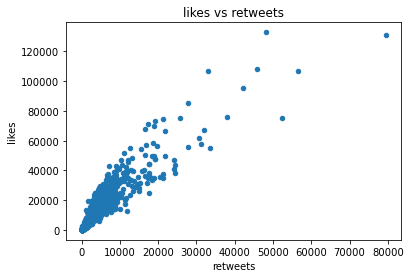

In [38]:
df.plot(x ='retweets',y= 'likes', kind='scatter', title='likes vs retweets')

<AxesSubplot:title={'center':'dog_type vs mean ratings'}, xlabel='dog_type'>

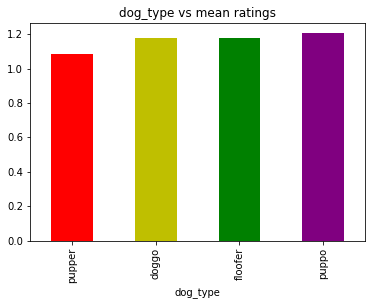

In [39]:
df.groupby('dog_type').mean().rating.sort_values().plot(kind='bar', color=['r', 'y', 'g', 'purple'], title='dog_type vs mean ratings')

<AxesSubplot:title={'center':'dog_breed vs mean rating'}, xlabel='dog breed', ylabel='mean rating'>

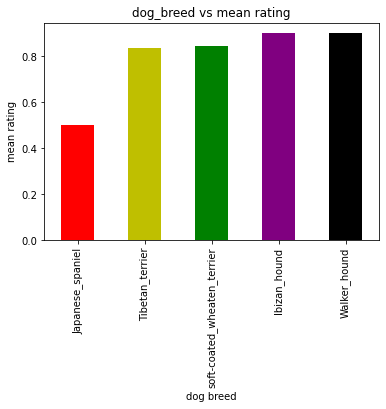

In [40]:
df.groupby('breed').mean().rating.sort_values()[:5].plot(kind='bar', color=['r', 'y', 'g', 'purple', 'black'], title='dog_breed vs mean rating', xlabel='dog breed', ylabel='mean rating')